## Temporal distribution of data for the three water masses seperated by region of CCS

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

IOPATH = '/ocean/rbeutel/MOAD/analysis-becca/Synthesis/data/CCS_obs.csv'

## Loading Data

In [3]:
obs = pd.read_csv(IOPATH)

In [ ]:
# add year column
# add year and month column
obs['time'] = pd.to_datetime(obs['time'])

obs['year'] = obs.time.dt.year
obs

,Unnamed: 0.1,Unnamed: 0,time,longitude (degrees_east),latitude (degrees_north),depth (m),pressure (dbar),temperature (degC),salinity (g kg-1),DO (umol kg-1),...,source,Nstar (umol kg-1),spice,density (kg m-3),current,location,[TA-DIC] (uM),NSdist,EWdist,year
0,0,0,1933-07-25 00:00:00+00:00,-126.76,49.34,1.0,1.008587,NaN,32.070847,NaN,...,ios bottle,NaN,NaN,NaN,shelf,shelf,NaN,0.000000,-0.0,1933
1,1,1,1933-07-25 00:00:00+00:00,-126.76,49.34,2.0,2.017180,NaN,32.090943,NaN,...,ios bottle,NaN,NaN,NaN,shelf,shelf,NaN,0.000000,-0.0,1933
2,2,2,1933-07-25 00:00:00+00:00,-126.76,49.34,4.0,4.034378,NaN,32.090906,NaN,...,ios bottle,NaN,NaN,NaN,shelf,shelf,NaN,0.000000,-0.0,1933
3,3,3,1933-07-25 00:00:00+00:00,-126.76,49.34,6.0,6.051598,NaN,32.090870,NaN,...,ios bottle,NaN,NaN,NaN,shelf,shelf,NaN,0.000000,-0.0,1933
4,4,4,1933-07-25 00:00:00+00:00,-126.76,49.34,10.0,10.086095,NaN,32.181305,NaN,...,ios bottle,NaN,NaN,NaN,shelf,shelf,NaN,0.000000,-0.0,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378648,1378648,1402109,2024-11-18 00:00:00+00:00,-124.95,44.38,0.0,0.000000,12.713836,32.386146,312.025459,...,ooi,NaN,-0.251376,1024.310436,NaN,slope,NaN,484.541716,NaN,2024
1378649,1378649,1402110,2024-11-18 00:00:00+00:00,-124.94,44.36,0.0,0.000000,12.712860,32.386131,NaN,...,ooi,NaN,-0.251582,1024.310612,NaN,slope,NaN,484.541716,NaN,2024
1378650,1378650,1402111,2024-11-18 00:00:00+00:00,-124.57,46.99,0.0,0.000000,10.586080,32.728763,202.661375,...,ooi,NaN,-0.405998,1024.962794,shelf,shelf,NaN,215.824564,-0.0,2024
1378651,1378651,1402112,2024-11-18 00:00:00+00:00,-124.56,46.99,0.0,0.000000,12.215222,32.245641,308.384776,...,ooi,NaN,-0.452611,1024.296731,shelf,shelf,NaN,215.824564,-0.0,2024


# Figures:

### All Observations Together

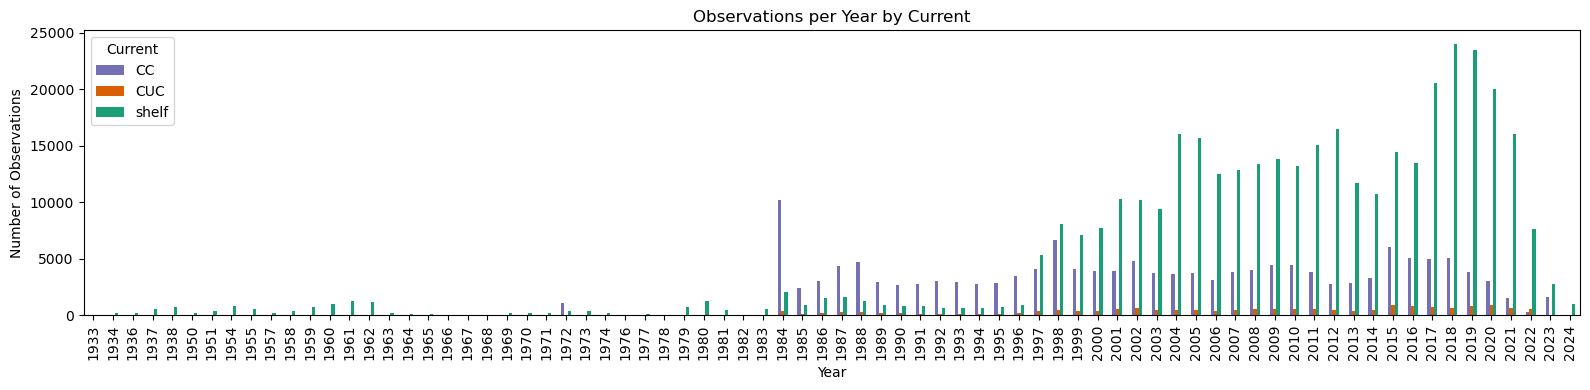

In [5]:
# Initial setup of all the data
obs_counts = obs.groupby(['year', 'current']).size().unstack(fill_value=0)

obs_counts = obs_counts.sort_index()

colors = {'CC': '#7570b3', 'CUC': '#d95f02', 'Shelf': '#1b9e77'}

fig, ax = plt.subplots(figsize=(16, 4))
obs_counts[['CC', 'CUC', 'shelf']].plot(kind='bar',ax=ax,color=[colors[col] for col in ['CC', 'CUC', 'Shelf']])

ax.set_xlabel('Year')
ax.set_ylabel('Number of Observations')
ax.set_title('Observations per Year by Current')
ax.legend(title='Current')
# ax.set_yscale('log')
plt.tight_layout()
plt.show()

## sorting by region

In [6]:
# from checkley and barth 2009 - "define the northern, central, and southern CCS, 
# with divisions at Cape Mendocino and Point Conception, respectively"
# Cape Mendocino = 40.44 N
# Point conception = 35.45 N

obs_northCCS = obs[obs['latitude (degrees_north)'] > 40.44]
obs_centerCCS = obs[(obs['latitude (degrees_north)'] <= 40.44) & (obs['latitude (degrees_north)'] > 35.45)]
obs_southCCS = obs[obs['latitude (degrees_north)'] <= 35.45]

### Northern CCS

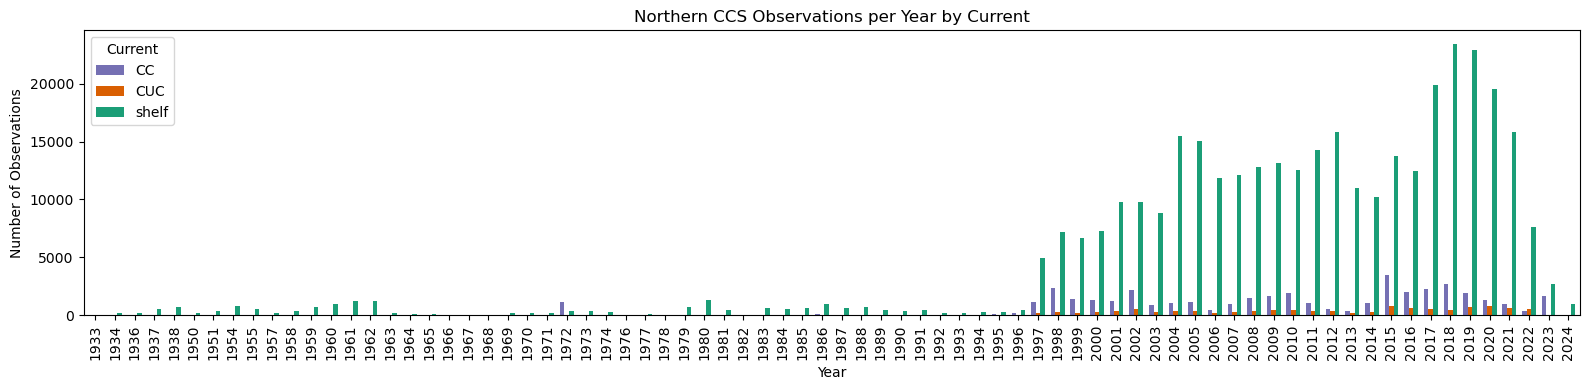

In [7]:
# Northern CCS observations
obs_counts = obs_northCCS.groupby(['year', 'current']).size().unstack(fill_value=0)

obs_counts = obs_counts.sort_index()

colors = {'CC': '#7570b3', 'CUC': '#d95f02', 'Shelf': '#1b9e77'}

fig, ax = plt.subplots(figsize=(16, 4))
obs_counts[['CC', 'CUC', 'shelf']].plot(kind='bar',ax=ax,color=[colors[col] for col in ['CC', 'CUC', 'Shelf']], width=0.7)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Observations')
ax.set_title('Northern CCS Observations per Year by Current')
ax.legend(title='Current')
# ax.set_yscale('log')
plt.tight_layout()
plt.show()

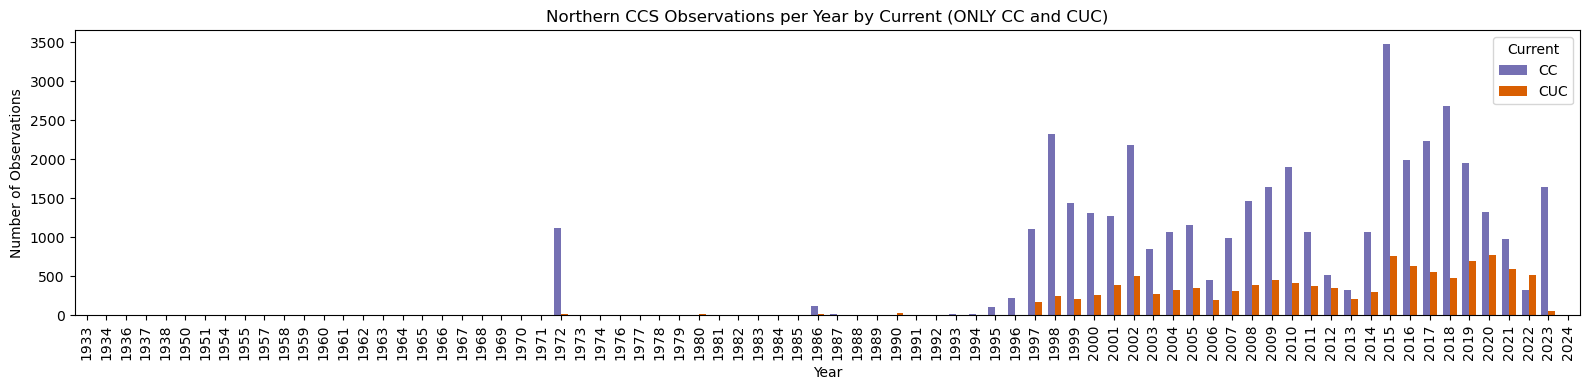

In [8]:
# Northern CCS observations
obs_counts = obs_northCCS.groupby(['year', 'current']).size().unstack(fill_value=0)

obs_counts = obs_counts.sort_index()

colors = {'CC': '#7570b3', 'CUC': '#d95f02'}

fig, ax = plt.subplots(figsize=(16, 4))
obs_counts[['CC', 'CUC']].plot(kind='bar',ax=ax,color=[colors[col] for col in ['CC', 'CUC']], width=0.7)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Observations')
ax.set_title('Northern CCS Observations per Year by Current (ONLY CC and CUC)')
ax.legend(title='Current')
plt.tight_layout()
plt.show()

### Central CCS

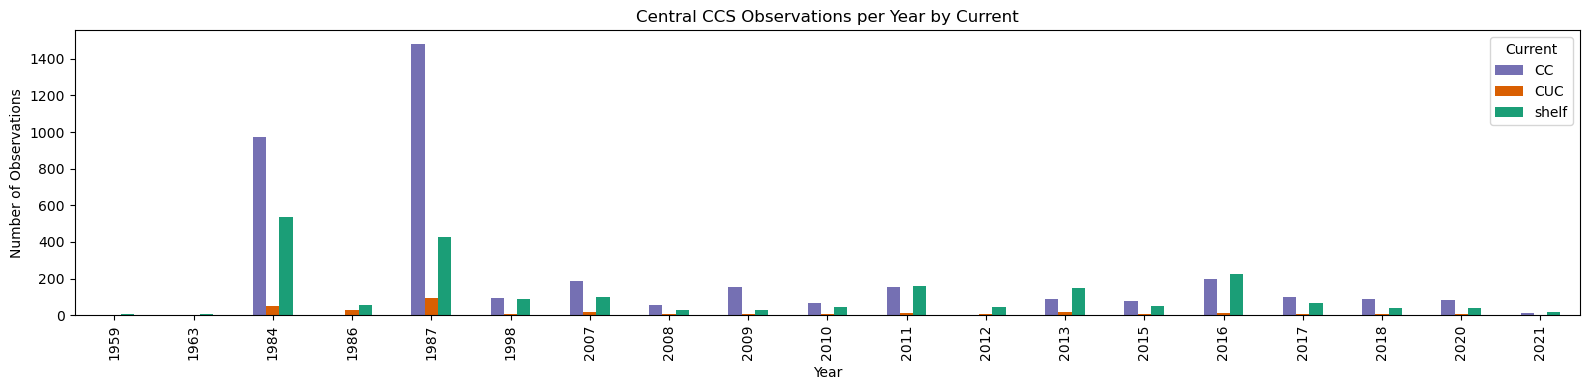

In [9]:
# Central CCS observations
obs_counts = obs_centerCCS.groupby(['year', 'current']).size().unstack(fill_value=0)

obs_counts = obs_counts.sort_index()

colors = {'CC': '#7570b3', 'CUC': '#d95f02', 'Shelf': '#1b9e77'}

fig, ax = plt.subplots(figsize=(16, 4))
obs_counts[['CC', 'CUC', 'shelf']].plot(kind='bar',ax=ax,color=[colors[col] for col in ['CC', 'CUC', 'Shelf']])

ax.set_xlabel('Year')
ax.set_ylabel('Number of Observations')
ax.set_title('Central CCS Observations per Year by Current')
ax.legend(title='Current', loc='upper right')
# ax.set_yscale('log')
plt.tight_layout()
plt.show()

### Southern CCS

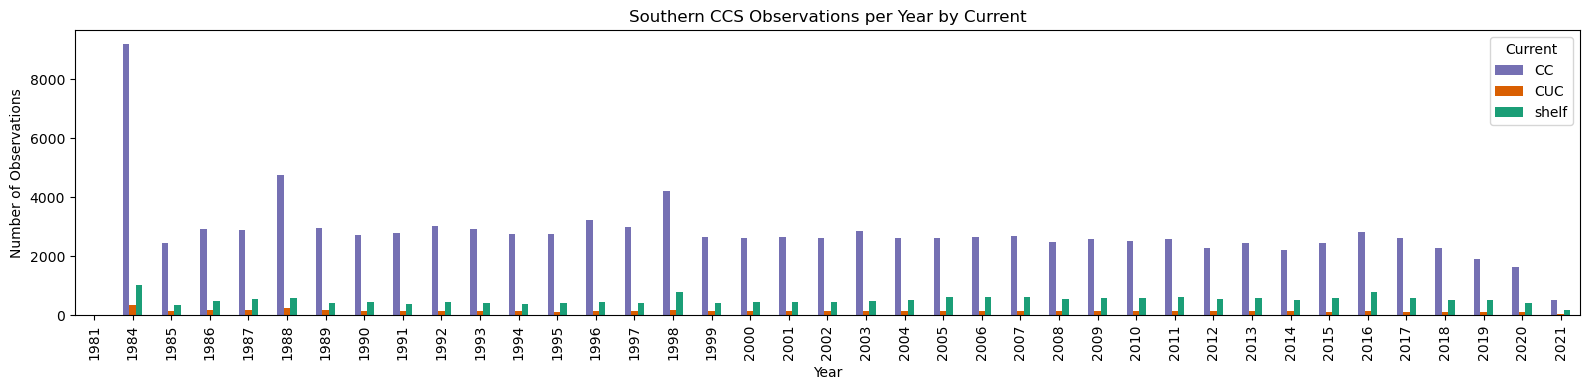

In [10]:
# Southern CCS observations
obs_counts = obs_southCCS.groupby(['year', 'current']).size().unstack(fill_value=0)

obs_counts = obs_counts.sort_index()

colors = {'CC': '#7570b3', 'CUC': '#d95f02', 'Shelf': '#1b9e77'}

fig, ax = plt.subplots(figsize=(16, 4))
obs_counts[['CC', 'CUC', 'shelf']].plot(kind='bar',ax=ax,color=[colors[col] for col in ['CC', 'CUC', 'Shelf']])

ax.set_xlabel('Year')
ax.set_ylabel('Number of Observations')
ax.set_title('Southern CCS Observations per Year by Current')
ax.legend(title='Current')
# ax.set_yscale('log')
plt.tight_layout()
plt.show()